In [1]:
from longi_class import LongitudinalAnalysis as la
import analysis_functions as af
import analyze as ana

In [1]:

names = af.assemble_names('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv')
files = [file for file in sorted(names) if 'summary' not in file if 'round' not in file]
for file in files:
    print(f'file is: {os.path.split(file)[-1]}')
    ana.run_analysis_script(file)


eam_break_2_crossed   

    beam_break_2_crossed  
0             600.256013  
1             711.071192  
2             826.693387  
3             939.390637  
4            1726.490185  
file is: 6_25_2021__14_12__Door_shape_vole_4139.csv
exp is Door_shape
importing door_shape analysis module
file is: 6_25_2021__14_12__Door_shape_vole_4145.csv
exp is Door_shape
importing door_shape analysis module
/Users/davidprotter/anaconda3/envs/Computing/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
file is: 6_25_2021__14_12__Door_shape_vole_784.csv
exp is Door_shape
importing door_shape analysis module
     Round               Event   door_2 open begin
86       6   door_2 open begin          594.50812

DuplicateRoundData: metric: door_1_lever_press_latency
day: 5
animal: 4136
old_file:   Round     value                                               file
0      0       NaN  /Users/davidprotter/Documents/Donaldson Lab/Se...
1      1  6.607865  /Users/davidprotter/Documents/Donaldson Lab/Se...
new_file:/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv/7_1_2021__11_47__Door_shape_vole_4136_analysis_by_round.csv

In [4]:

lon = la('test')
names = af.assemble_names('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv')
round_files = [file for file in sorted(names) if 'round' in file]
for file in round_files:
    lon.add_by_round_csv(file)

/Users/davidprotter/anaconda3/envs/Computing/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/davidprotter/Documents/Donaldson Lab/Don_GIT/Operant_Daily_Pipeline/longi_class.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['file'] = file


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [6]:
def make_violin(df, day = None, violin_color = None, swarm_color = 'black', ax = None):
    

    if not ax:
        fig, ax = plt.subplots(ncols = 1, nrows = 1)
    else:
        sns.violinplot(y = df.value[~np.isnan(df.value)], bw = 0.25, color = violin_color, ax = ax)
        sns.swarmplot(y = df.value[~np.isnan(df.value)], ax = ax, color = swarm_color)
        ax.set_title(day)
    return ax

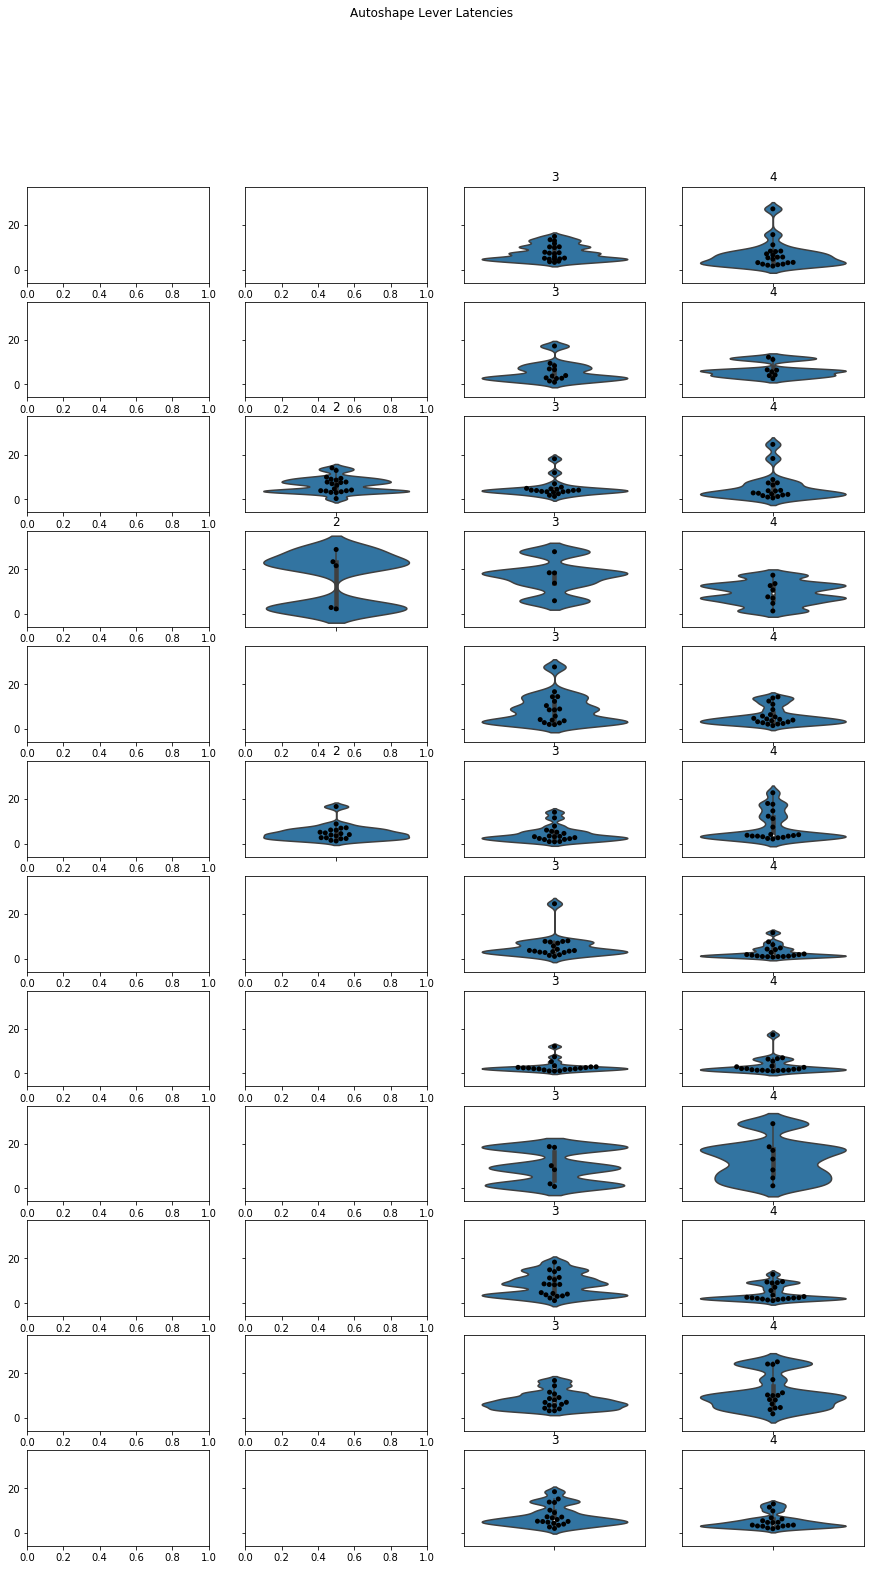

In [7]:
data = lon.metrics['food_lever_press_latency'].get_data("Autoshape")

fig, axs = plt.subplots(ncols = 4, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Autoshape Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][int(day)-1]
        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax)
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')
        
        
        


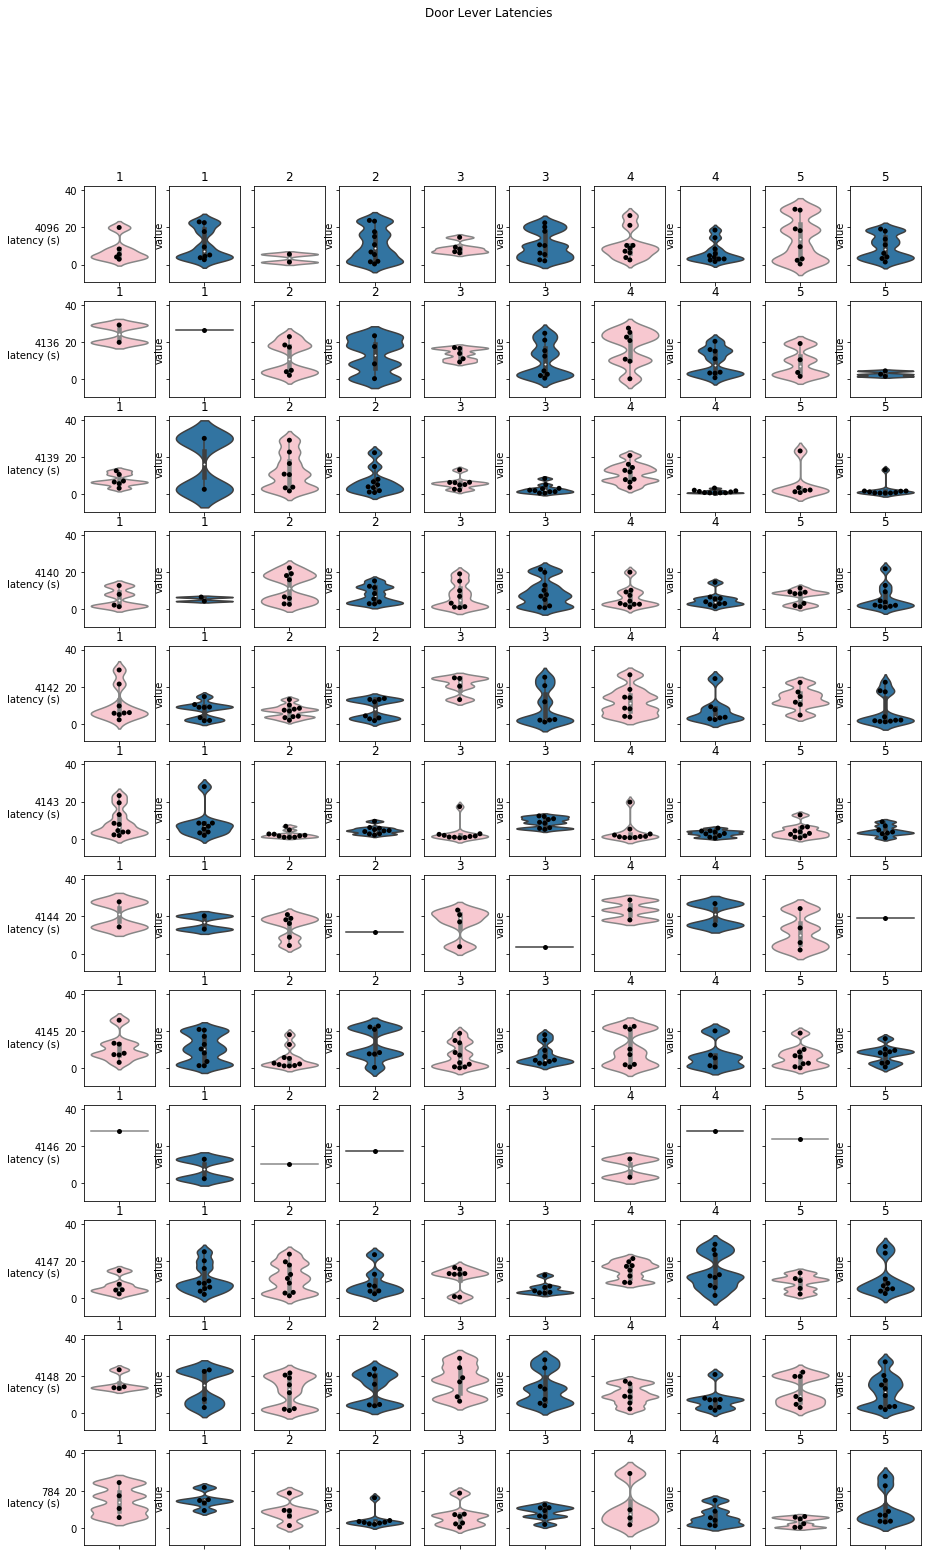

In [8]:
data = lon.metrics['door_1_lever_press_latency'].get_data("Door_shape")
data2 = lon.metrics['door_2_lever_press_latency'].get_data("Door_shape")

fig, axs = plt.subplots(ncols = 10, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Door Lever Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2)
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

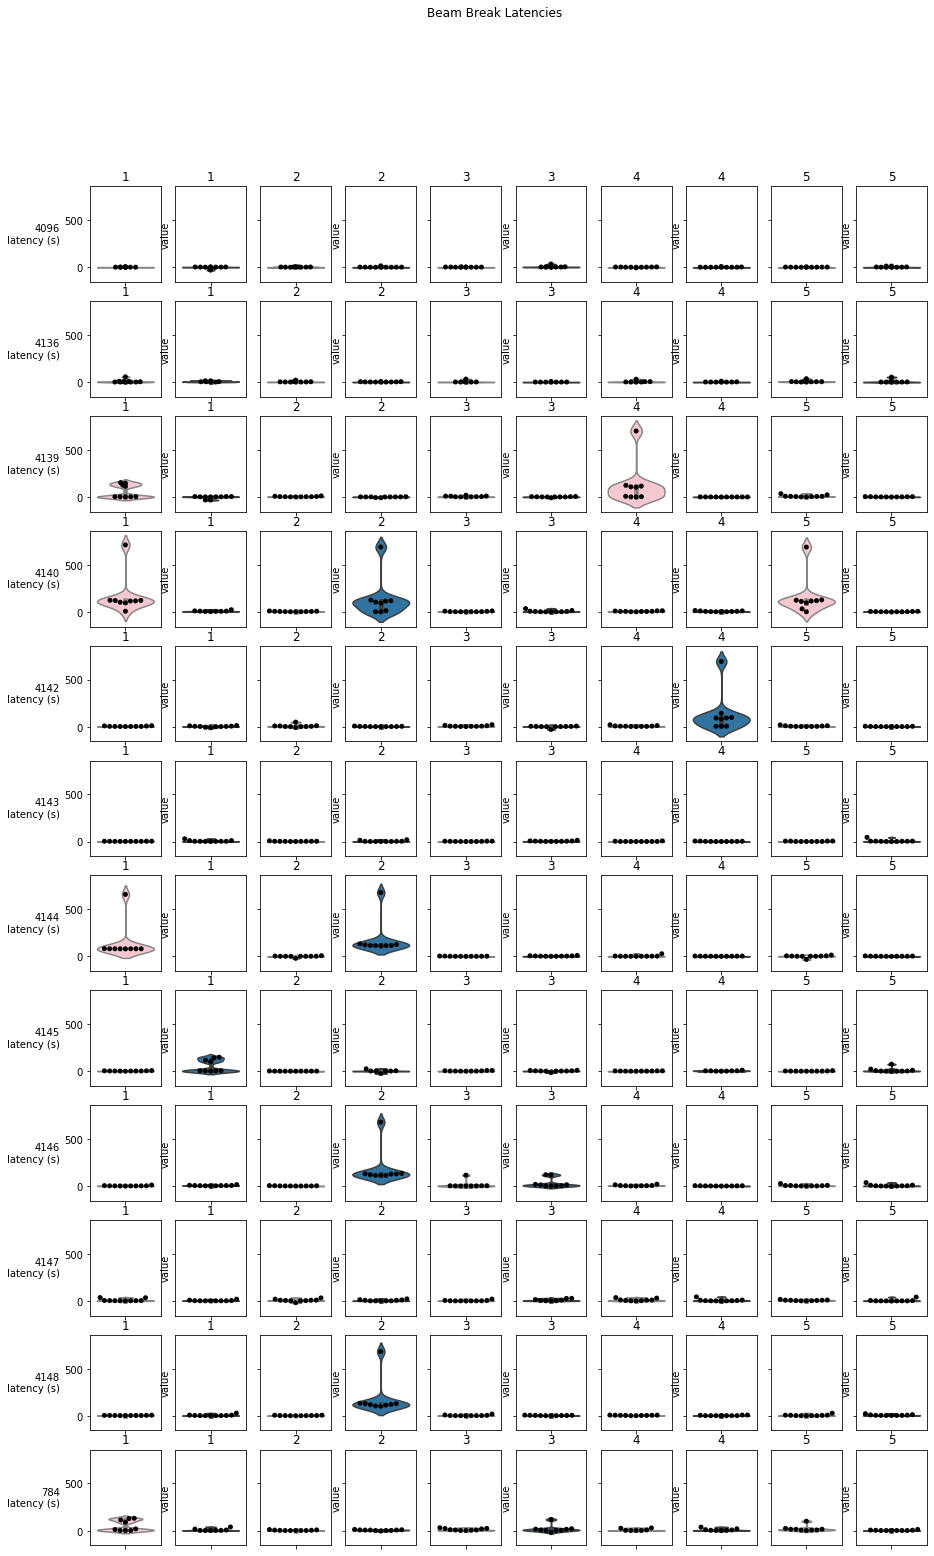

In [9]:
data = lon.metrics['latency_beam_break_door1'].get_data("Door_shape")
data2 = lon.metrics['latency_beam_break_door2'].get_data("Door_shape")

fig, axs = plt.subplots(ncols = 10, nrows = 12, figsize = (15,25), sharey = True)

fig.suptitle('Beam Break Latencies')
for i, ani in enumerate(data.keys()):
    for day in data[ani].keys():
        this_ax = axs[i][(int(day)-1)*2]
        this_ax_d2 = axs[i][(int(day)-1)*2+1]

        df = data[ani][day]
        _ = make_violin(df, day = day, ax = this_ax, violin_color = 'pink')
        df2 = data2[ani][day]
        _ = make_violin(df2, day = day, ax = this_ax_d2)
        if day == '1':
            this_ax.set_ylabel(f'{ani}\nlatency (s)', rotation = 'horizontal', ha = 'right', va = 'center')
            
        else:
            this_ax.set_ylabel('')

In [17]:
lon.metrics['latency_beam_break_door1'].data['4140']['Door_shape']['1']


,Round,value,file
0,0,NaN,/Users/davidprotter/Documents/Donaldson Lab/Se...
1,1,6.705016,/Users/davidprotter/Documents/Donaldson Lab/Se...
2,2,123.172579,/Users/davidprotter/Documents/Donaldson Lab/Se...
3,3,114.704482,/Users/davidprotter/Documents/Donaldson Lab/Se...
4,4,119.871524,/Users/davidprotter/Documents/Donaldson Lab/Se...
5,5,709.959982,/Users/davidprotter/Documents/Donaldson Lab/Se...
6,6,NaN,/Users/davidprotter/Documents/Donaldson Lab/Se...
7,7,NaN,/Users/davidprotter/Documents/Donaldson Lab/Se...
8,8,NaN,/Users/davidprotter/Documents/Donaldson Lab/Se...
9,9,NaN,/Users/davidprotter/Documents/Donaldson Lab/Se...


In [15]:
f

'/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv/6_25_2021__15_52__Door_shape_vole_4140_analysis_by_round.csv'

In [ ]:
lon.metrics['door_1_lever_press_latency'].data['4136']

In [23]:
import analyze as ana

In [24]:
_,_, df = ana.prep_for_analysis('/Users/davidprotter/Documents/Donaldson Lab/Sex_diff_c1/csv/6_25_2021__14_12__Door_shape_vole_4145.csv')

In [26]:
af.latency_to_beam_break(df)

/Users/davidprotter/anaconda3/envs/Computing/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


{'latency_beam_break_door1':      Round               Event         Time  latency_beam_break_door1
 11       1   door_1 open begin    15.947590                  4.912650
 28       2   door_1 open begin   121.932305                  2.146489
 45       3   door_1 open begin   235.067508                  2.838246
 62       4   door_1 open begin   346.731687                  3.092433
 79       5   door_1 open begin   454.901778                  7.277844
 179     11   door_1 open begin  1154.945403                  2.664751
 194     12   door_1 open begin  1267.320160                  2.334387
 211     13   door_1 open begin  1362.924964                  1.062422
 226     14   door_1 open begin  1491.879003                  4.965267
 243     15   door_1 open begin  1600.309254                  2.392653,
 'latency_beam_break_door2':      Round               Event         Time  latency_beam_break_door2
 96       6   door_2 open begin   584.794129                  5.354680
 113      7   door_2